In [2]:
library(phyloseq)
library(ggplot2)
library(vegan)
library(readr)
library(data.table)
library(dplyr)
library(stats)
library(ggpubr)
library(dunn.test)

In [3]:
cadaver_5krare = readRDS("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/RDSfiles/all_cohorts_cadaver_5krare.rds")


In [4]:
#Subset by Country
Ita = subset_samples(cadaver_5krare, Location=="Italy")
Fin = subset_samples(cadaver_5krare, Location=="Finland")
USA = subset_samples(cadaver_5krare, Location=="USA")
USA = subset_samples(USA, Case_no!="C41")


In [5]:
#Subset by Organ (by country)

liver.fin = subset_samples(Fin, Organ=="Liver") #Finland only includes liver anyway

brain.ita = subset_samples(Ita, Organ=="Brain")
heart.ita = subset_samples(Ita, Organ=="Heart")
liver.ita = subset_samples(Ita, Organ=="Liver")
prostate.ita = subset_samples(Ita, Organ=="Prostate")
spleen.ita = subset_samples(Ita, Organ=="Spleen")
uterus.ita = subset_samples(Ita, Organ=="Uterus")

blood.usa = subset_samples(USA, Organ=="Blood")
brain.usa = subset_samples(USA, Organ=="Brain")
heart.usa = subset_samples(USA, Organ=="Heart")
liver.usa = subset_samples(USA, Organ=="Liver")
spleen.usa = subset_samples(USA, Organ=="Spleen")


In [6]:
sample_tab = read.csv("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/final_biom/all_cadaver_metadata.csv")
colnames(sample_tab)[1] <- "SampleID"

### Measure Observed Richness for all organs by country

In [11]:
obs = estimate_richness(na.omit(cadaver_5krare), split = TRUE, measures = "Observed")


In [12]:
#All countries
#obs = estimate_richness(na.omit(cadaver_5krare), split = TRUE, measures = "Observed")
obs = read.csv("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/temp_files/obs.all.csv")
#obs$SampleID = rownames(obs)
dfobs.all = merge(obs, sample_tab, on="SampleID")

#Italy by Organ

obs = estimate_richness(na.omit(Ita), split = TRUE, measures = "Observed")
obs$SampleID = rownames(obs)
dfobs.ita = merge(obs, sample_tab, on="SampleID")

#Finland by Organ

#obs.fin = estimate_richness(na.omit(Fin), split = TRUE, measures = "Observed")
obs.fin = read.csv("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/temp_files/obs.fin.csv")
#obs.fin$SampleID = rownames(obs.fin)
dfobs.fin = merge(obs.fin, sample_tab, on="SampleID")

#USA by Organ

#obs.usa = estimate_richness(na.omit(USA), split = TRUE, measures = "Observed")
obs.usa = read.csv("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/temp_files/obs.usa.csv")
#obs.usa$SampleID = rownames(obs.usa)
dfobs.usa = merge(obs.usa, sample_tab, on="SampleID")



### Check normality of data

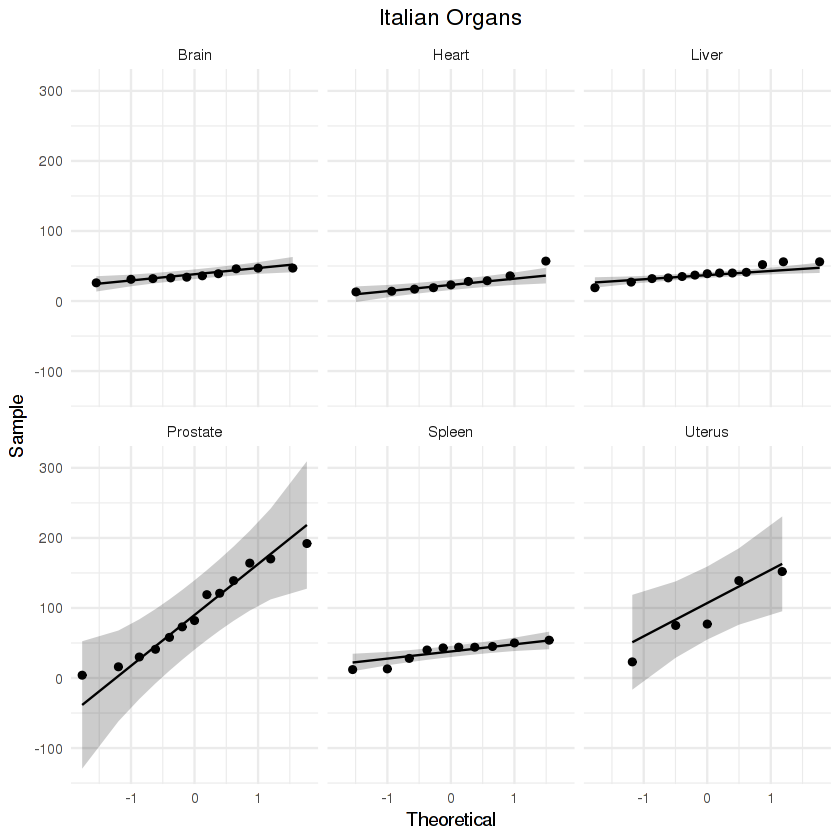

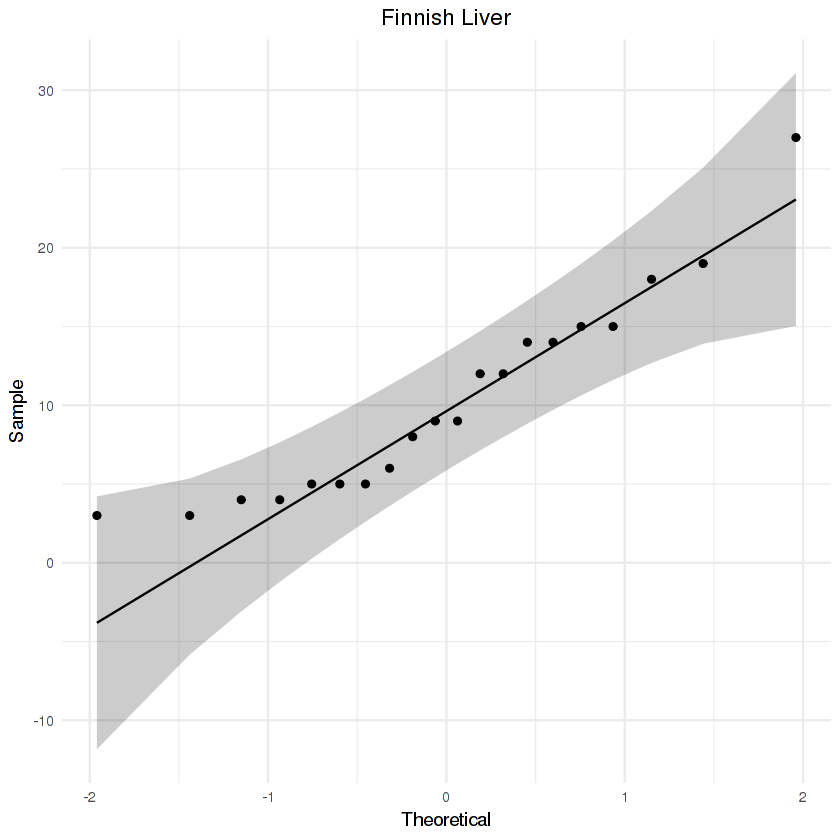

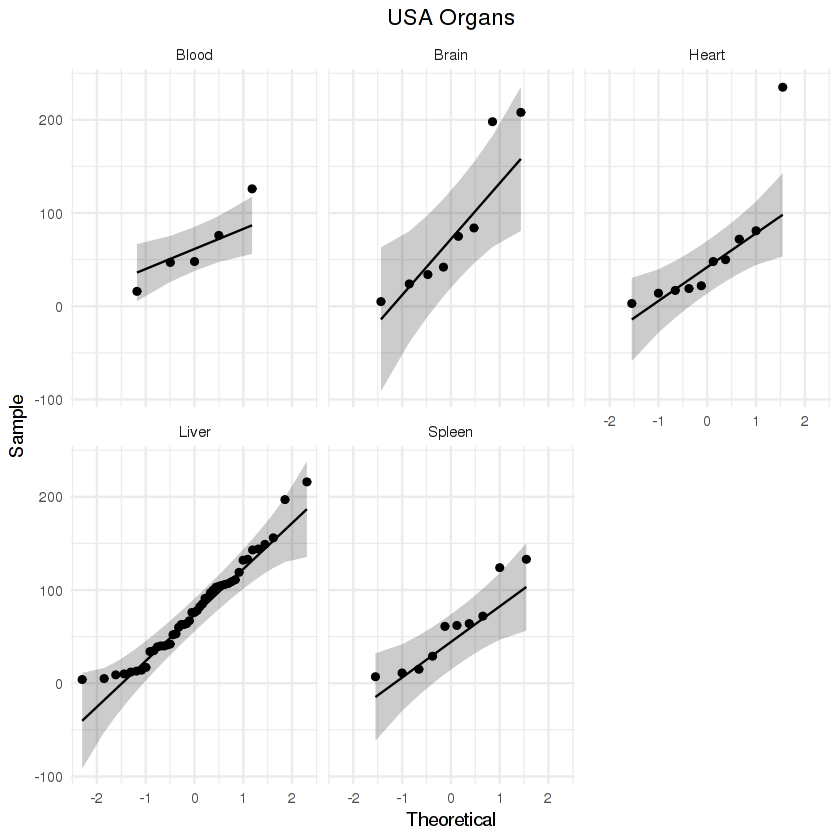

In [55]:
#Q-Q plots

p1 = ggqqplot(dfobs.ita, x = "Observed") + ggtitle("Italian Organs")
p1 = p1 + facet_wrap("Organ") + theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

p2 = ggqqplot(dfobs.fin, x = "Observed") + ggtitle("Finnish Liver")
p2 = p2 + theme_minimal() + theme(plot.title = element_text(hjust = 0.5))


p3 = ggqqplot(dfobs.usa, x = "Observed") + ggtitle("USA Organs")
p3 = p3 + facet_wrap("Organ") + theme_minimal() + theme(plot.title = element_text(hjust = 0.5))


p1
p2
p3

### Plot linear regressions by country

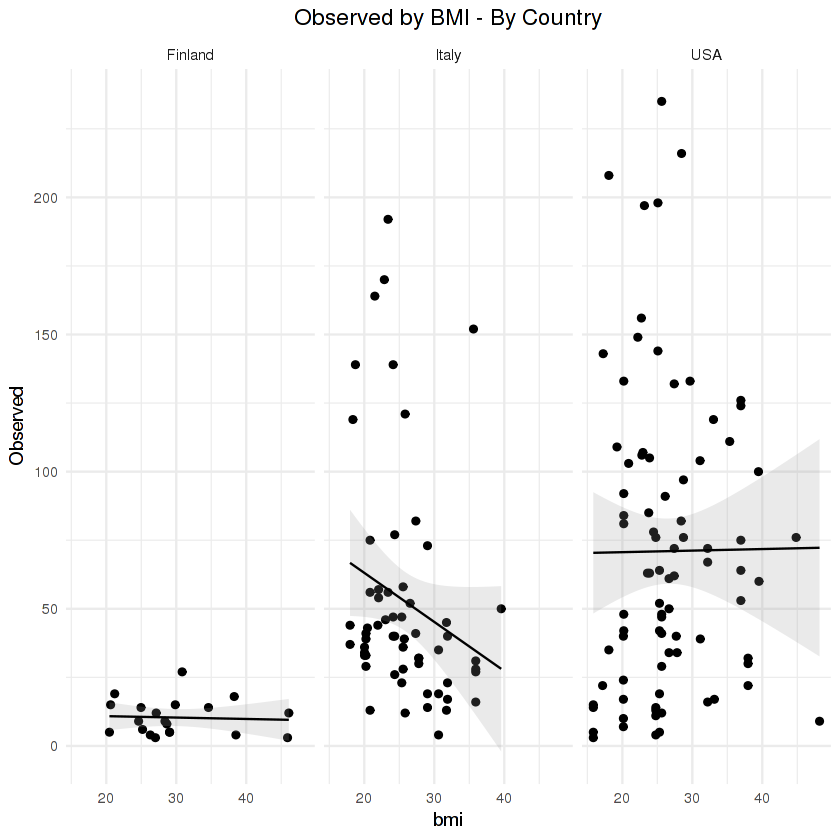

In [13]:
p = ggplot(dfobs.all, aes(x=bmi, y=Observed)) + geom_point() +  ggtitle("Observed by BMI - By Country")
p = p + geom_smooth(method = "lm", se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5)) #+
        #scale_colour_brewer(palette = "Spectral")
p = p + facet_wrap(~Location)
p


### Plot linear regressions of all organs by country

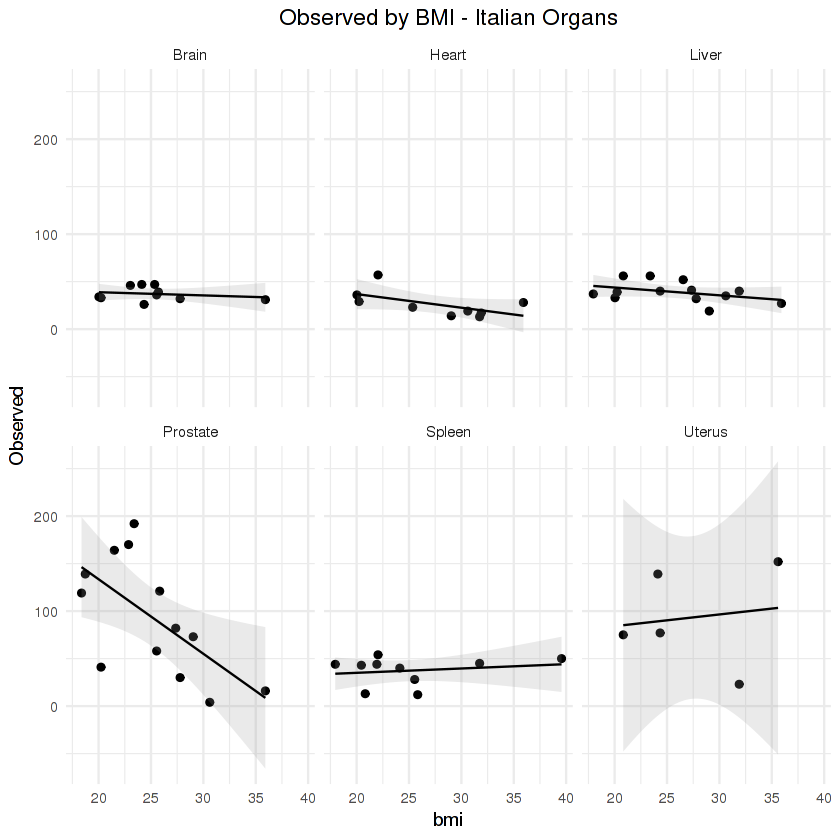

In [8]:
p = ggplot(dfobs.ita, aes(x=bmi, y=Observed)) + geom_point() +  ggtitle("Observed by BMI - Italian Organs")
p = p + geom_smooth(method = "lm", se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5)) #+
        #scale_colour_brewer(palette = "Spectral")

p2 = p + facet_wrap(~Organ)
p2


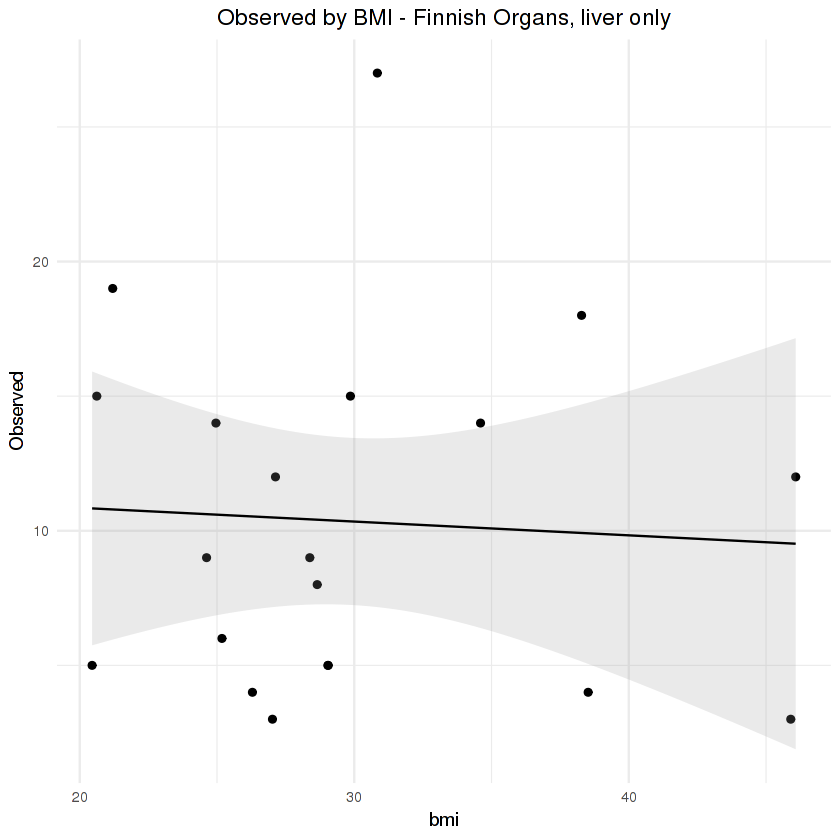

In [9]:
p = ggplot(dfobs.fin, aes(x=bmi, y=Observed)) + geom_point() +  ggtitle("Observed by BMI - Finnish Organs, liver only")
p = p + geom_smooth(method = "lm", se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5)) #+
        #scale_colour_brewer(palette = "Spectral")

p
#p2 = p + facet_wrap(~Organ)
#p2


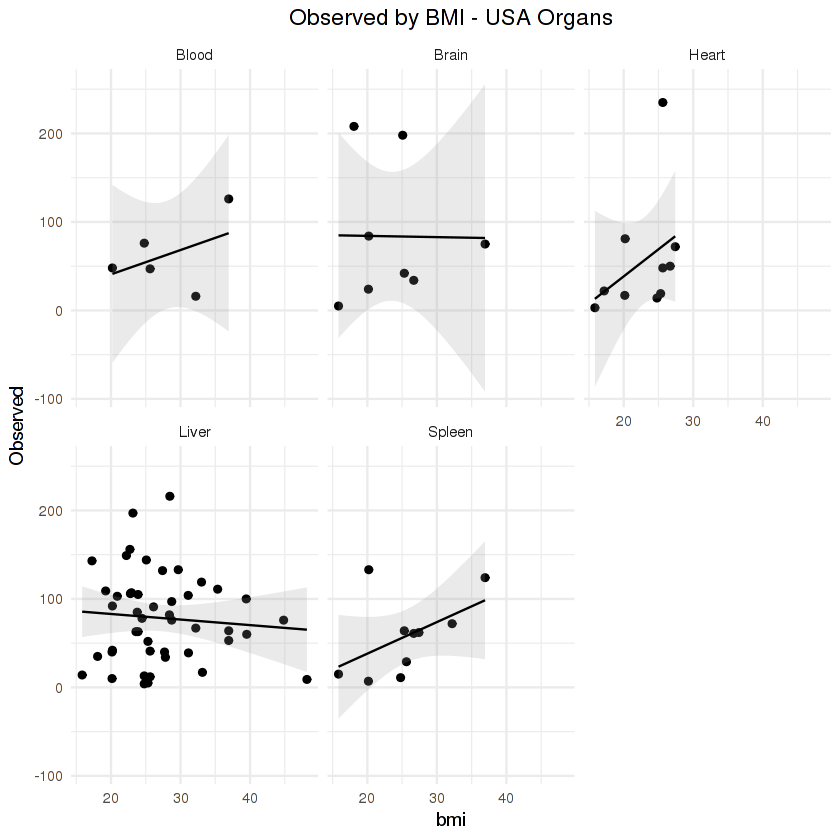

In [10]:
p = ggplot(dfobs.usa, aes(x=bmi, y=Observed)) + geom_point() +  ggtitle("Observed by BMI - USA Organs")
p = p + geom_smooth(method = "lm", se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

p2 = p + facet_wrap(~Organ)
p2


### Repeat regressions broken down by Organ and locality

In [11]:
#######
#Italy#
#######

#brain
obs = estimate_richness(na.omit(brain.ita), split = TRUE, measures = "Observed")
obs$SampleID = rownames(obs)
brain.dfobs.ita = merge(obs, sample_tab, on="SampleID")
#heart
obs = estimate_richness(na.omit(heart.ita), split = TRUE, measures = "Observed")
obs$SampleID = rownames(obs)
heart.dfobs.ita = merge(obs, sample_tab, on="SampleID")
#liver
obs = estimate_richness(na.omit(liver.ita), split = TRUE, measures = "Observed")
obs$SampleID = rownames(obs)
liver.dfobs.ita = merge(obs, sample_tab, on="SampleID")
#prostate
obs = estimate_richness(na.omit(prostate.ita), split = TRUE, measures = "Observed")
obs$SampleID = rownames(obs)
prostate.dfobs.ita = merge(obs, sample_tab, on="SampleID")
#spleen
obs = estimate_richness(na.omit(spleen.ita), split = TRUE, measures = "Observed")
obs$SampleID = rownames(obs)
spleen.dfobs.ita = merge(obs, sample_tab, on="SampleID")
#uterus
obs = estimate_richness(na.omit(uterus.ita), split = TRUE, measures = "Observed")
obs$SampleID = rownames(obs)
uterus.dfobs.ita = merge(obs, sample_tab, on="SampleID")

#####
#USA#
#####

#blood
blood.dfobs.usa = subset(dfobs.usa, Organ=="Blood")
#brain
brain.dfobs.usa = subset(dfobs.usa, Organ=="Brain")
#heart
heart.dfobs.usa = subset(dfobs.usa, Organ=="Heart")
#liver
liver.dfobs.usa = subset(dfobs.usa, Organ=="Liver")
#spleen
spleen.dfobs.usa = subset(dfobs.usa, Organ=="Spleen")


#########
#Finland#
#########

#Liver only
liver.dfobs.fin = subset(dfobs.fin, Organ=="Liver")


### Estimate fit for each organ by country

In [12]:
#Italian Brain
p1 = ggplot(brain.dfobs.ita, aes(x=bmi, y=Observed)) + geom_point() +  ggtitle("Observed by bmi - Italian Brain")
p1 = p1 + geom_smooth(method = "lm", se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

fit = lm(Observed ~ bmi, data = brain.dfobs.ita)
anova(fit)
summary(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
bmi,1,20.34956,20.34956,0.344506,0.5734264
Residuals,8,472.55044,59.06881,NA,NA



Call:
lm(formula = Observed ~ bmi, data = brain.dfobs.ita)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.391  -4.689  -1.742   6.644   9.949 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  45.5744    14.6412   3.113   0.0144 *
bmi          -0.3362     0.5728  -0.587   0.5734  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.686 on 8 degrees of freedom
Multiple R-squared:  0.04129,	Adjusted R-squared:  -0.07855 
F-statistic: 0.3445 on 1 and 8 DF,  p-value: 0.5734


In [13]:
#Italian Heart
p2 = ggplot(heart.dfobs.ita, aes(x=bmi, y=Observed)) + geom_point() +  ggtitle("Observed by bmi - Italian heart")
p2 = p2 + geom_smooth(method = "lm", se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))
fit = lm(Observed ~ bmi, data = heart.dfobs.ita)
anova(fit)
summary(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
bmi,1,540.2741,540.2741,3.838414,0.09092853
Residuals,7,985.2815,140.7545,NA,NA



Call:
lm(formula = Observed ~ bmi, data = heart.dfobs.ita)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.9251 -7.0424 -2.8275 -0.8197 23.0601 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  65.5173    20.4430   3.205   0.0150 *
bmi          -1.4327     0.7313  -1.959   0.0909 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.86 on 7 degrees of freedom
Multiple R-squared:  0.3541,	Adjusted R-squared:  0.2619 
F-statistic: 3.838 on 1 and 7 DF,  p-value: 0.09093


In [14]:
#Italian Liver
p3 = ggplot(liver.dfobs.ita, aes(x=bmi, y=Observed)) + geom_point() +  ggtitle("Observed by bmi - Italian liver")
p3 = p3 + geom_smooth(method = "lm", se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

fit = lm(Observed ~ bmi, data = liver.dfobs.ita)
anova(fit)
summary(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
bmi,1,226.9585,226.9585,2.124643,0.1728968
Residuals,11,1175.0415,106.8220,NA,NA



Call:
lm(formula = Observed ~ bmi, data = liver.dfobs.ita)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.3851  -5.4088  -0.2259   5.9571  14.9961 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  60.1587    14.7963   4.066  0.00186 **
bmi          -0.8189     0.5618  -1.458  0.17290   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.34 on 11 degrees of freedom
Multiple R-squared:  0.1619,	Adjusted R-squared:  0.08569 
F-statistic: 2.125 on 1 and 11 DF,  p-value: 0.1729


In [15]:
#Italian Spleen
p4 = ggplot(spleen.dfobs.ita, aes(x=bmi, y=Observed)) + geom_point() +  ggtitle("Observed by bmi - Italian spleen")
p4 = p4 + geom_smooth(method = "lm", se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

fit = lm(Observed ~ bmi, data = spleen.dfobs.ita)
anova(fit)
summary(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
bmi,1,76.28049,76.28049,0.3263651,0.5834958
Residuals,8,1869.81951,233.72744,NA,NA



Call:
lm(formula = Observed ~ bmi, data = spleen.dfobs.ita)

Residuals:
    Min      1Q  Median      3Q     Max 
-25.680  -6.385   5.332   8.022  18.052 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  25.8732    20.5779   1.257    0.244
bmi           0.4571     0.8001   0.571    0.583

Residual standard error: 15.29 on 8 degrees of freedom
Multiple R-squared:  0.0392,	Adjusted R-squared:  -0.0809 
F-statistic: 0.3264 on 1 and 8 DF,  p-value: 0.5835


In [16]:
#Italian Prostate
p5 = ggplot(prostate.dfobs.ita, aes(x=bmi, y=Observed)) + geom_point() +  ggtitle("Observed by bmi - Italian prostate")
p5 = p5 + geom_smooth(method = "lm", se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

fit = lm(Observed ~ bmi, data = prostate.dfobs.ita)
anova(fit)
summary(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
bmi,1,18849.24,18849.235,7.467258,0.01948657
Residuals,11,27766.76,2524.251,NA,NA



Call:
lm(formula = Observed ~ bmi, data = prostate.dfobs.ita)

Residuals:
    Min      1Q  Median      3Q     Max 
-90.715 -32.061   6.215  33.213  85.073 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  290.405     73.572   3.947  0.00228 **
bmi           -7.844      2.871  -2.733  0.01949 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 50.24 on 11 degrees of freedom
Multiple R-squared:  0.4044,	Adjusted R-squared:  0.3502 
F-statistic: 7.467 on 1 and 11 DF,  p-value: 0.01949


In [17]:
#Italian Uterus
p6 = ggplot(uterus.dfobs.ita, aes(x=bmi, y=Observed)) + geom_point() +  ggtitle("Observed by bmi - Italian uterus")
p6 = p6 + geom_smooth(method = "lm", se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

fit = lm(Observed ~ bmi, data = uterus.dfobs.ita)
anova(fit)
summary(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
bmi,1,229.5672,229.5672,0.063491,0.8173371
Residuals,3,10847.2328,3615.7443,NA,NA



Call:
lm(formula = Observed ~ bmi, data = uterus.dfobs.ita)

Residuals:
     1      2      3      4      5 
 49.79  48.63 -75.80 -12.48 -10.14 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)   59.451    136.612   0.435    0.693
bmi            1.234      4.897   0.252    0.817

Residual standard error: 60.13 on 3 degrees of freedom
Multiple R-squared:  0.02073,	Adjusted R-squared:  -0.3057 
F-statistic: 0.06349 on 1 and 3 DF,  p-value: 0.8173


In [18]:
#US Blood
p7 = ggplot(blood.dfobs.usa, aes(x=bmi, y=Observed)) + geom_point() +  ggtitle("Observed by bmi - USA blood")
p7 = p7 + geom_smooth(method = "lm", se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

fit = lm(Observed ~ bmi, data = blood.dfobs.usa)
anova(fit)
summary(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
bmi,1,1316.153,1316.153,0.7164628,0.459482
Residuals,3,5511.047,1837.016,NA,NA



Call:
lm(formula = Observed ~ bmi, data = blood.dfobs.usa)

Residuals:
      5      13      17      22      36 
  6.689 -58.272  22.098  38.697  -9.211 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  -14.219     92.758  -0.153    0.888
bmi            2.749      3.248   0.846    0.459

Residual standard error: 42.86 on 3 degrees of freedom
Multiple R-squared:  0.1928,	Adjusted R-squared:  -0.07629 
F-statistic: 0.7165 on 1 and 3 DF,  p-value: 0.4595


In [19]:
#US Brain
p8 = ggplot(brain.dfobs.usa, aes(x=bmi, y=Observed)) + geom_point() +  ggtitle("Observed by bmi - USA Brain")
p8 = p8 + geom_smooth(method = "lm", se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

fit = lm(Observed ~ bmi, data = brain.dfobs.usa)
anova(fit)
summary(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
bmi,1,6.085845,6.085845,0.00085814,0.9775802
Residuals,6,42551.414155,7091.902359,NA,NA



Call:
lm(formula = Observed ~ bmi, data = brain.dfobs.usa)

Residuals:
   Min     1Q Median     3Q    Max 
-79.83 -52.04 -24.18  28.45 123.48 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)   87.067    117.083   0.744    0.485
bmi           -0.141      4.812  -0.029    0.978

Residual standard error: 84.21 on 6 degrees of freedom
Multiple R-squared:  0.000143,	Adjusted R-squared:  -0.1665 
F-statistic: 0.0008581 on 1 and 6 DF,  p-value: 0.9776


In [20]:
#US Heart
p9 = ggplot(heart.dfobs.usa, aes(x=bmi, y=Observed)) + geom_point() +  ggtitle("Observed by bmi - USA heart")
p9 = p9 + geom_smooth(method = "lm", se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

fit = lm(Observed ~ bmi, data = heart.dfobs.usa)
anova(fit)
summary(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
bmi,1,5840.799,5840.799,1.305203,0.2863022
Residuals,8,35800.101,4475.013,NA,NA



Call:
lm(formula = Observed ~ bmi, data = heart.dfobs.usa)

Residuals:
    Min      1Q  Median      3Q     Max 
-53.733 -28.193 -17.114  -1.939 162.126 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  -83.912    124.366  -0.675    0.519
bmi            6.120      5.357   1.142    0.286

Residual standard error: 66.9 on 8 degrees of freedom
Multiple R-squared:  0.1403,	Adjusted R-squared:  0.0328 
F-statistic: 1.305 on 1 and 8 DF,  p-value: 0.2863


In [21]:
#US Liver
p10 = ggplot(liver.dfobs.usa, aes(x=bmi, y=Observed)) + geom_point() +  ggtitle("Observed by bmi - USA liver")
p10 = p10 + geom_smooth(method = "lm", se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

fit = lm(Observed ~ bmi, data = liver.dfobs.usa)
anova(fit)
summary(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
bmi,1,888.5949,888.5949,0.3433487,0.5608303
Residuals,45,116461.1073,2588.0246,NA,NA



Call:
lm(formula = Observed ~ bmi, data = liver.dfobs.usa)

Residuals:
    Min      1Q  Median      3Q     Max 
-75.969 -39.647  -1.483  26.941 138.347 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  95.5695    30.1139   3.174  0.00271 **
bmi          -0.6295     1.0744  -0.586  0.56083   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 50.87 on 45 degrees of freedom
Multiple R-squared:  0.007572,	Adjusted R-squared:  -0.01448 
F-statistic: 0.3433 on 1 and 45 DF,  p-value: 0.5608


In [22]:
#US Spleen
p11 = ggplot(spleen.dfobs.usa, aes(x=bmi, y=Observed)) + geom_point() +  ggtitle("Observed by bmi - USA spleen")
p11 = p11 + geom_smooth(method = "lm", se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

fit = lm(Observed ~ bmi, data = spleen.dfobs.usa)
anova(fit)
summary(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
bmi,1,4199.886,4199.886,2.481888,0.1538127
Residuals,8,13537.714,1692.214,NA,NA



Call:
lm(formula = Observed ~ bmi, data = spleen.dfobs.usa)

Residuals:
    Min      1Q  Median      3Q     Max 
-44.195 -24.291  -5.472   4.955  94.123 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  -33.097     59.146  -0.560    0.591
bmi            3.563      2.262   1.575    0.154

Residual standard error: 41.14 on 8 degrees of freedom
Multiple R-squared:  0.2368,	Adjusted R-squared:  0.1414 
F-statistic: 2.482 on 1 and 8 DF,  p-value: 0.1538


In [23]:
#Finnish Liver (only liver from Finland)
p12 = ggplot(liver.dfobs.fin, aes(x=bmi, y=Observed)) + geom_point() +  ggtitle("Observed by bmi - Finnish liver")
p12 = p12 + geom_smooth(method = "lm", se=TRUE, alpha=.2, color="black", size=0.5) +
        theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

fit = lm(Observed ~ bmi, data = liver.dfobs.fin)
anova(fit)
summary(fit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
bmi,1,2.735825,2.735825,0.06266731,0.8051637
Residuals,18,785.814175,43.656343,NA,NA



Call:
lm(formula = Observed ~ bmi, data = liver.dfobs.fin)

Residuals:
   Min     1Q Median     3Q    Max 
-7.494 -5.500 -1.520  3.965 16.701 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 11.87632    6.27358   1.893   0.0745 .
bmi         -0.05116    0.20437  -0.250   0.8052  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.607 on 18 degrees of freedom
Multiple R-squared:  0.003469,	Adjusted R-squared:  -0.05189 
F-statistic: 0.06267 on 1 and 18 DF,  p-value: 0.8052


### Print plots for figures

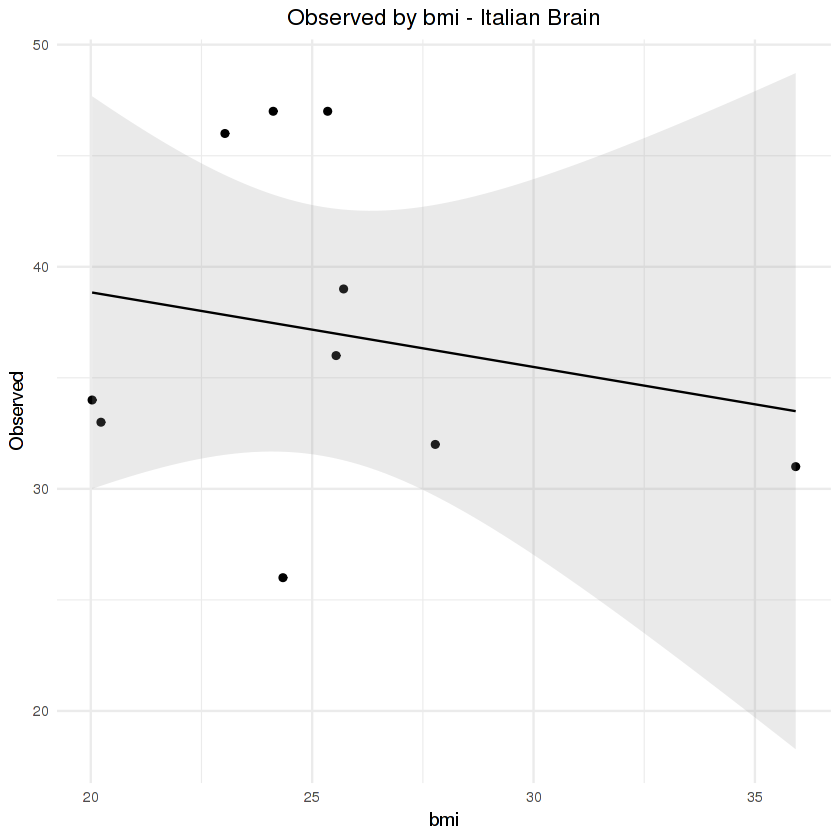

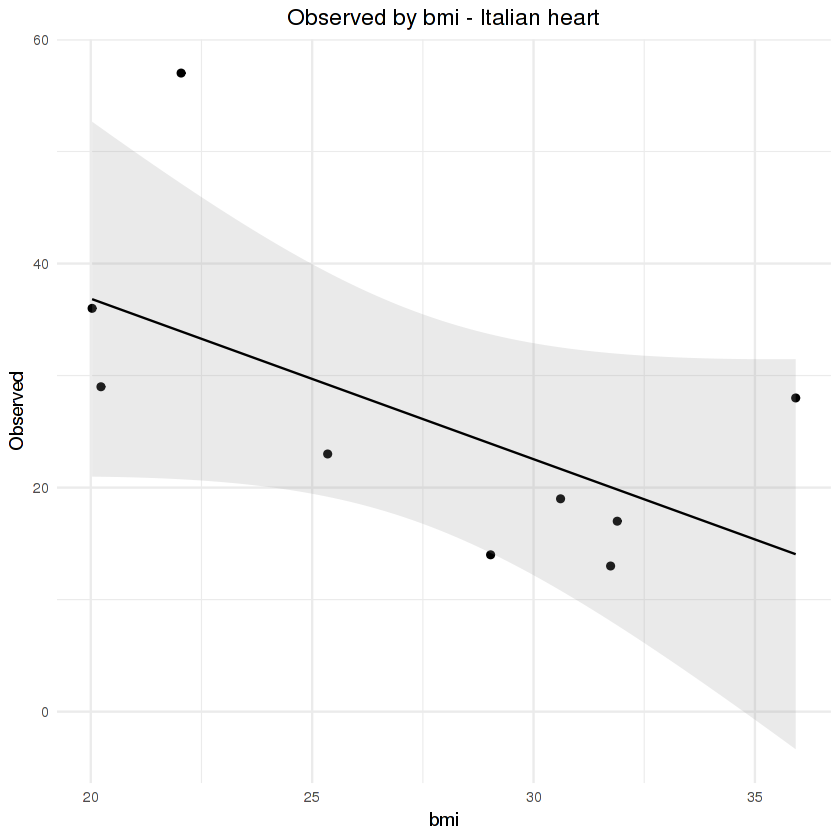

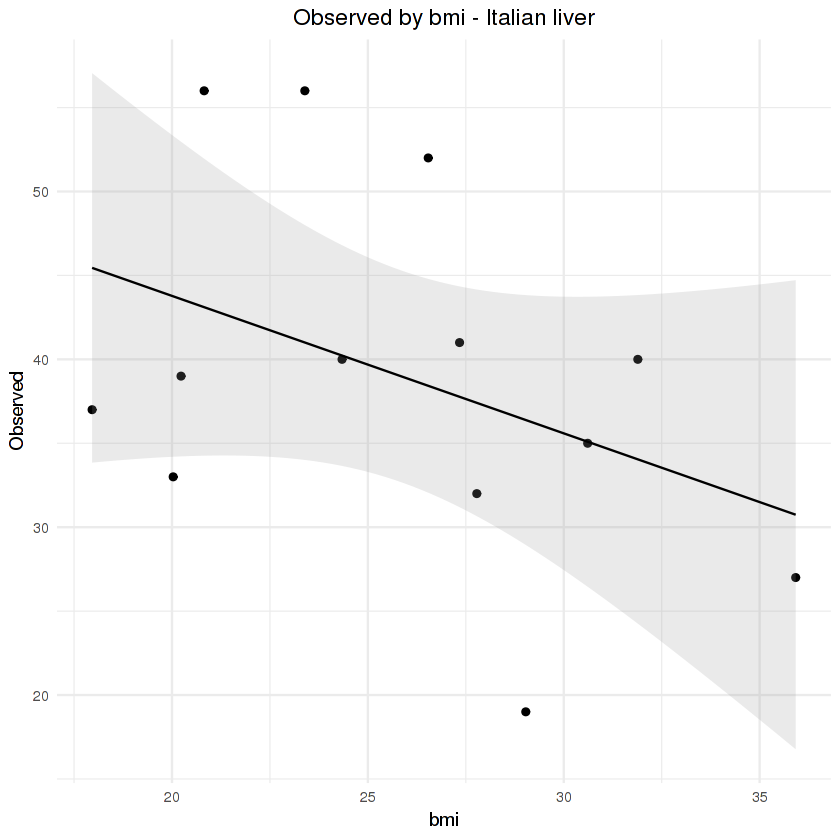

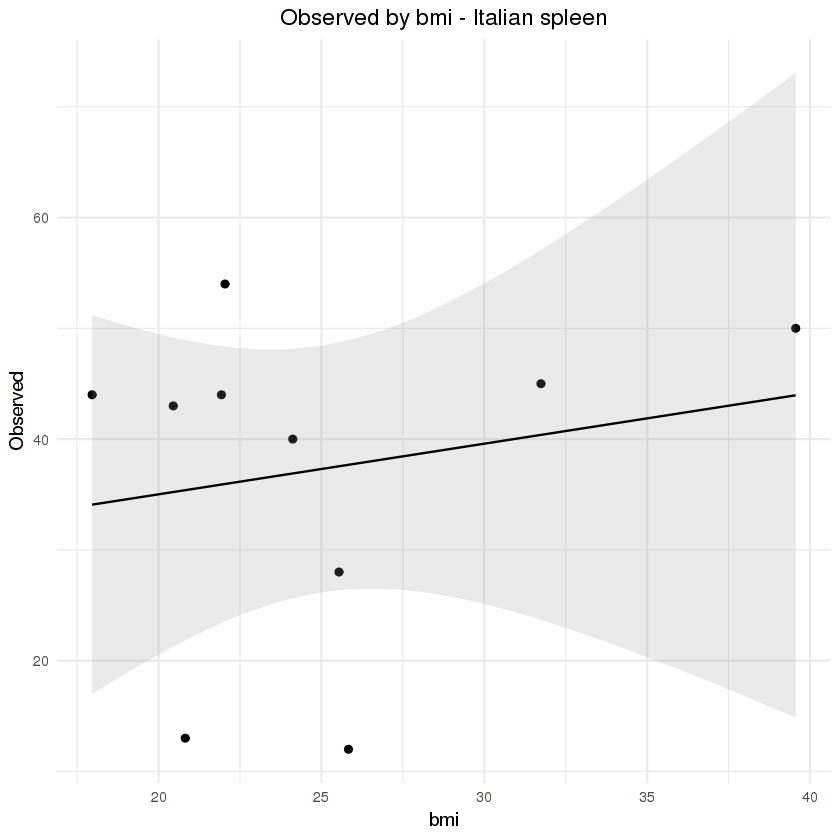

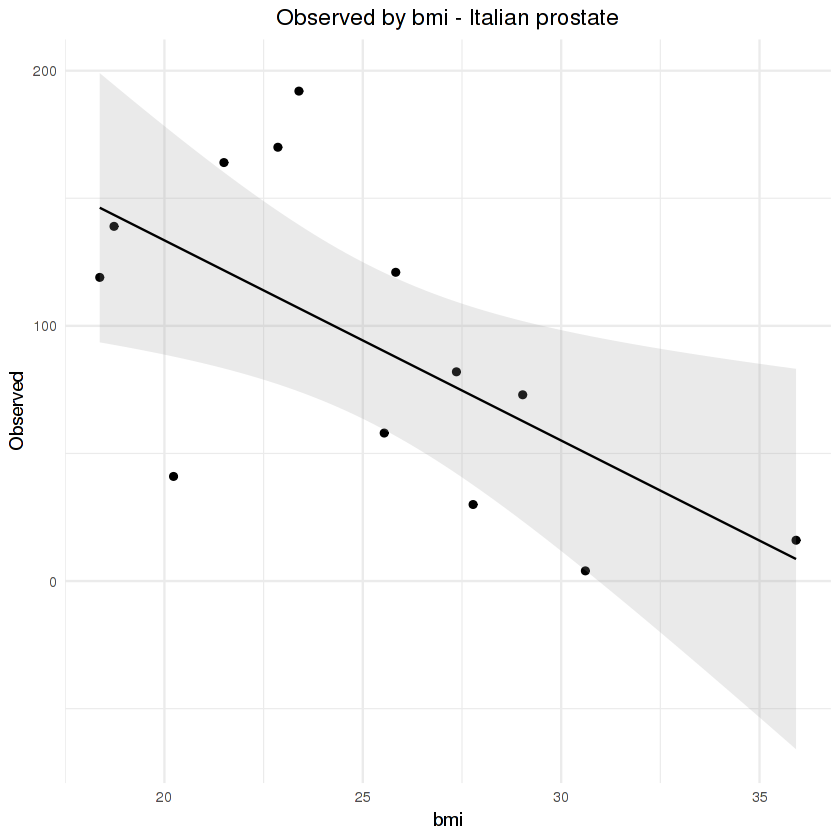

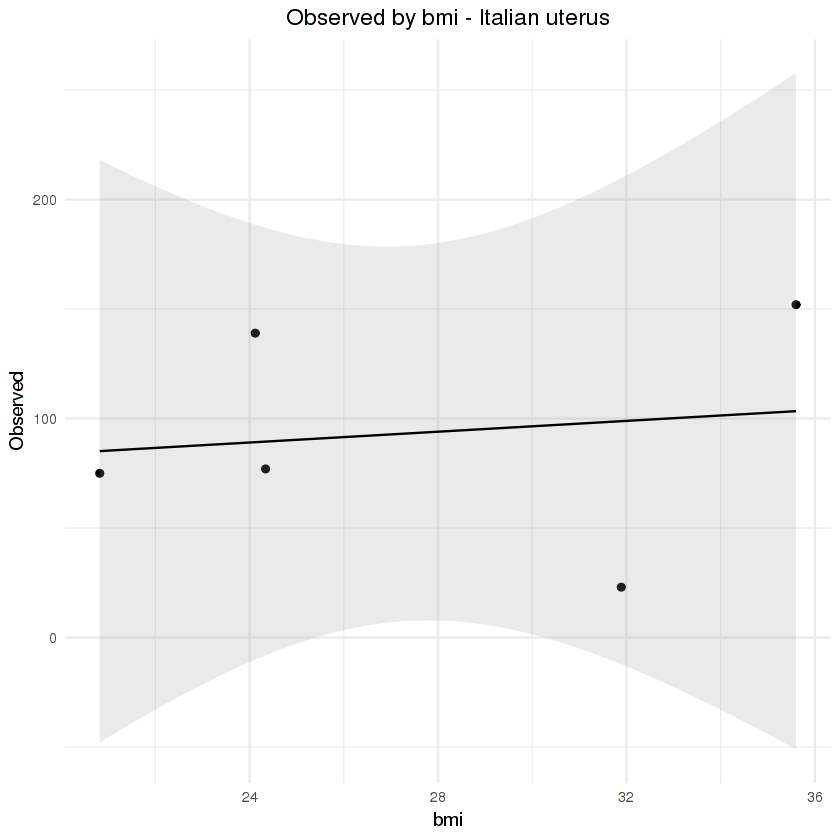

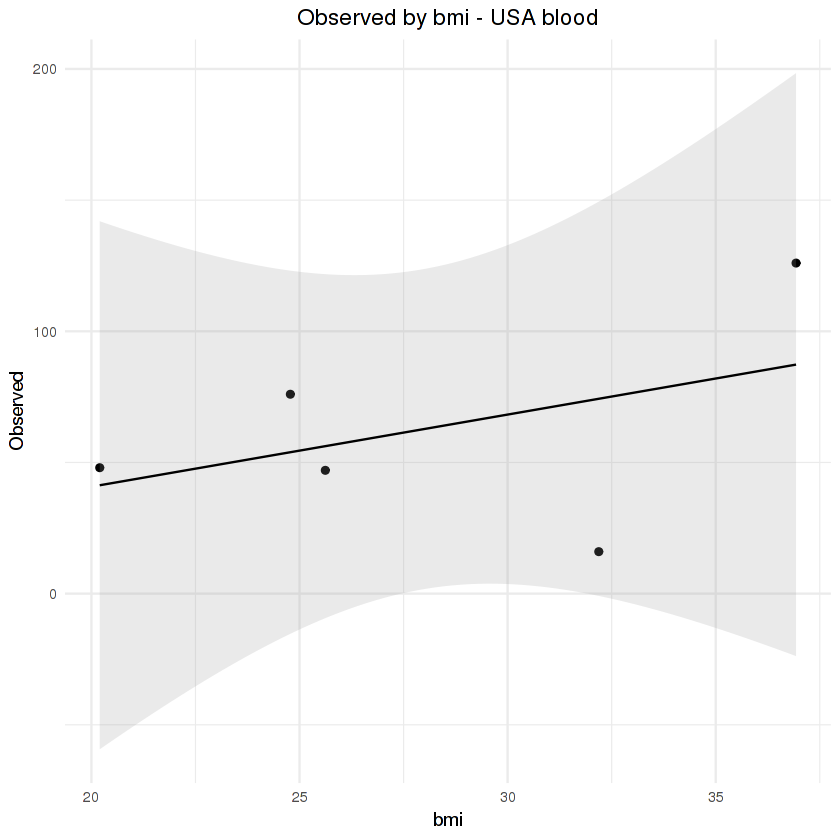

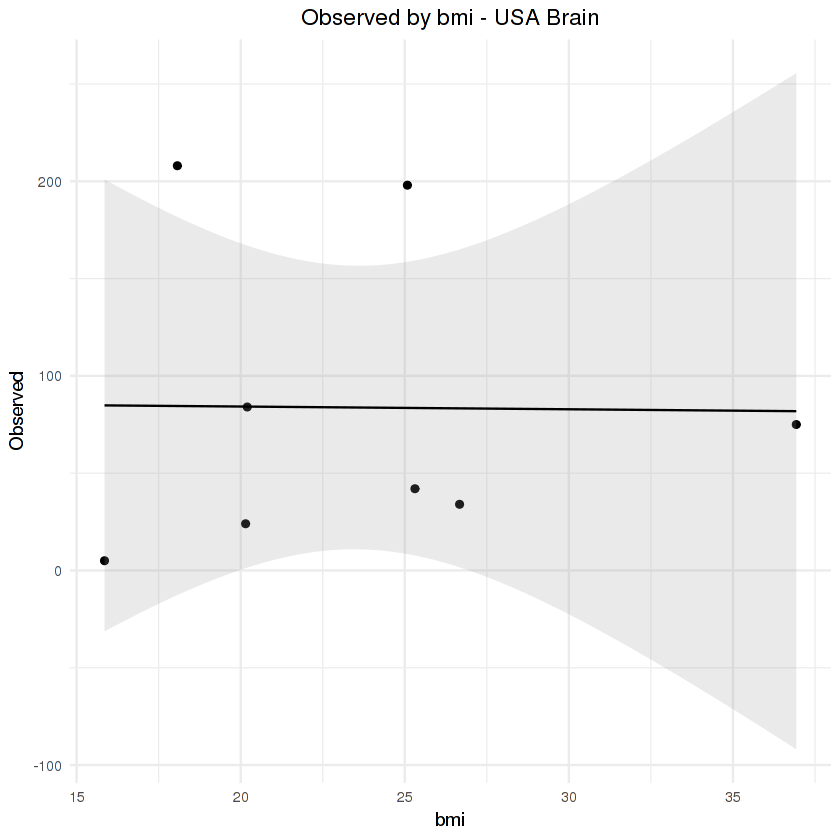

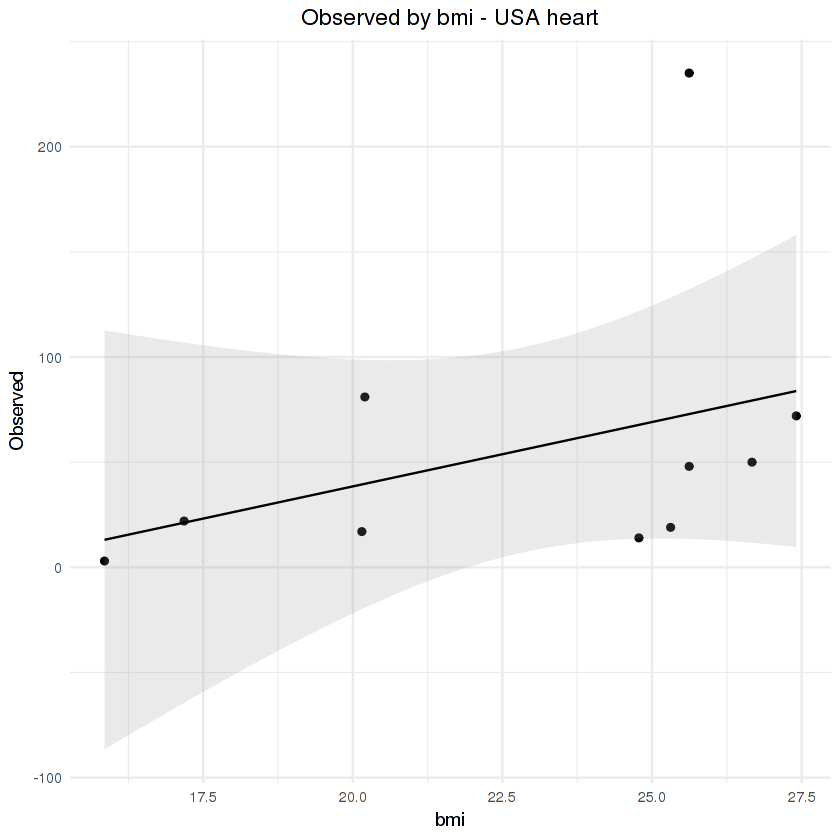

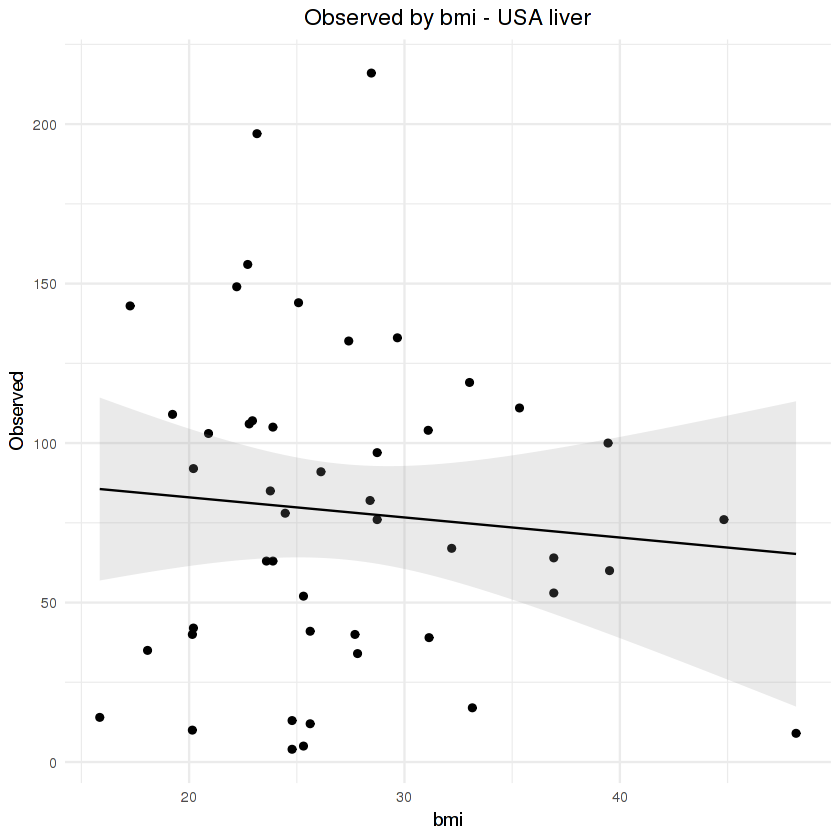

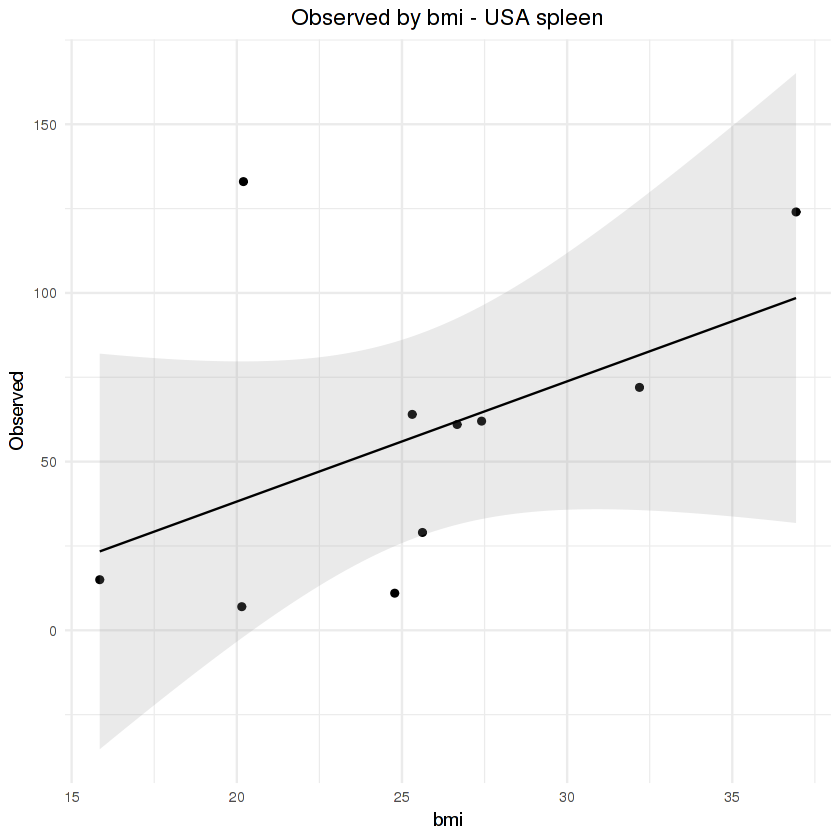

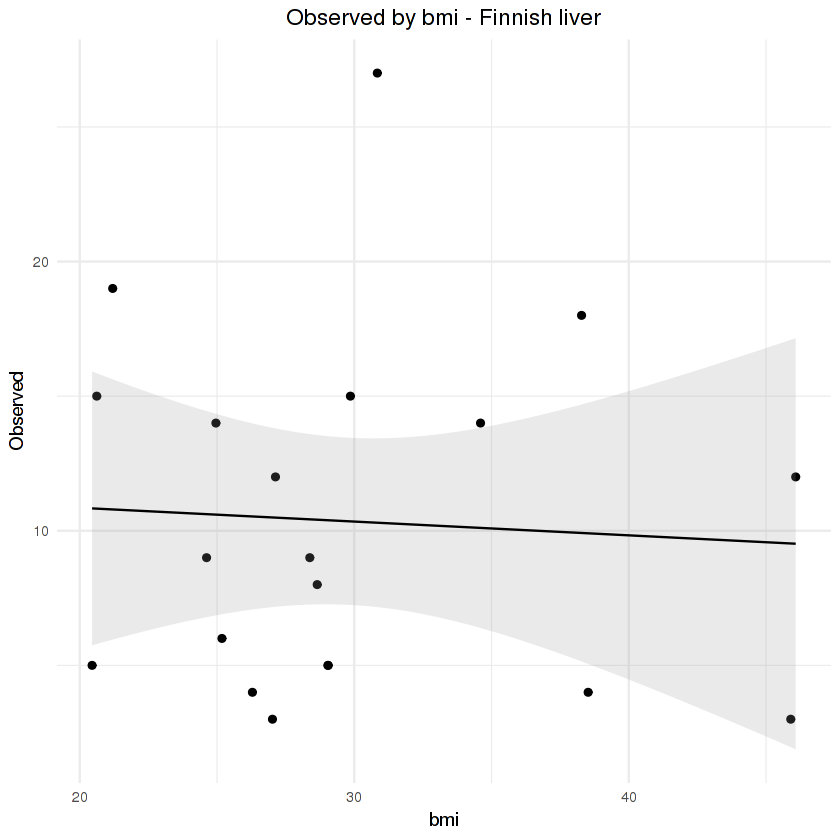

In [24]:
p1 
p2 
p3
p4
p5
p6
p7
p8
p9
p10
p11
p12